<a href="https://colab.research.google.com/github/AzamChatrAzar/neumerical-datasets/blob/main/deiabet1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [2]:
#بارگذاری دیتا ست diabetes
diabet=load_diabetes()
data=pd.DataFrame(diabet.data ,columns=diabet.feature_names)
data["target"]=diabet.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [3]:
data.shape

(442, 11)

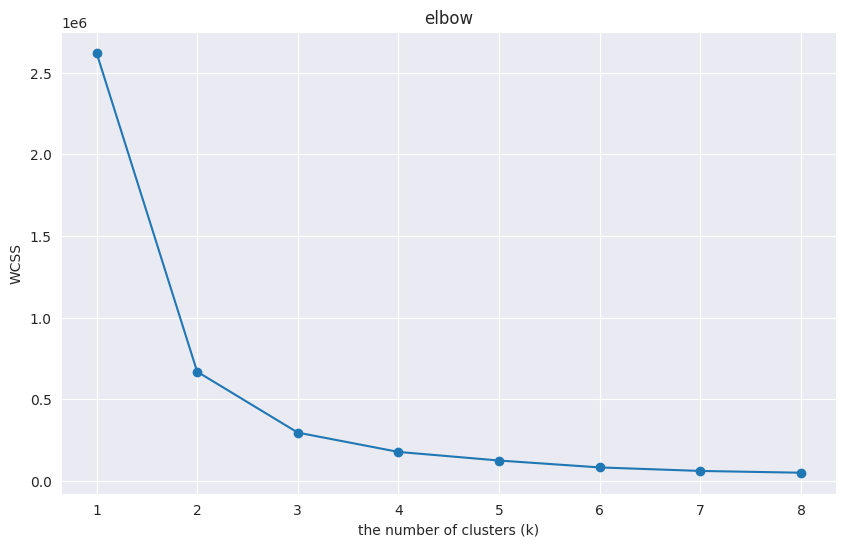

the optimal number of clustters: 5


In [4]:
#روش اول Kmean
#پیدا کردن kمناسب با استفده از elbow

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from seaborn import set_style
set_style('darkgrid')


wcss = []  # مجموع مربعات درون کلاسترها
max_k = 8 # حداکثر تعداد کلاسترها

for k in range(1, max_k + 1):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)  # ذخیره مجموع مربعات درون کلاسترها

# رسم نمودار روش آرنج
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_k + 1), wcss, marker='o')
plt.title('elbow')
plt.xlabel('the number of clusters (k)')
plt.ylabel('WCSS')
plt.show()



# محاسبه نقطه عطف  به صورت خودکار
diff = np.diff(wcss)
diff2 = np.diff(diff)

# پیدا کردن نقطه عطف
optimal_k = np.argmin(diff2) + 2  # +2 برای تنظیم ایندکس به تعداد کلاستر


# چاپ تعداد کلاستر بهینه
print(f"the optimal number of clustters: {optimal_k}")


#  K-Means با تعداد کلاسترهای بهینه
kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(data)

# اضافه کردن برچسب کلاستر به داده‌ها
data['Cluster'] = kmeans.labels_



In [5]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Cluster
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,2
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,2
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,3
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,2


In [6]:
#row del
cleaned_df=data.dropna()
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      442 non-null    float64
 1   sex      442 non-null    float64
 2   bmi      442 non-null    float64
 3   bp       442 non-null    float64
 4   s1       442 non-null    float64
 5   s2       442 non-null    float64
 6   s3       442 non-null    float64
 7   s4       442 non-null    float64
 8   s5       442 non-null    float64
 9   s6       442 non-null    float64
 10  target   442 non-null    float64
 11  Cluster  442 non-null    int32  
dtypes: float64(11), int32(1)
memory usage: 39.8 KB


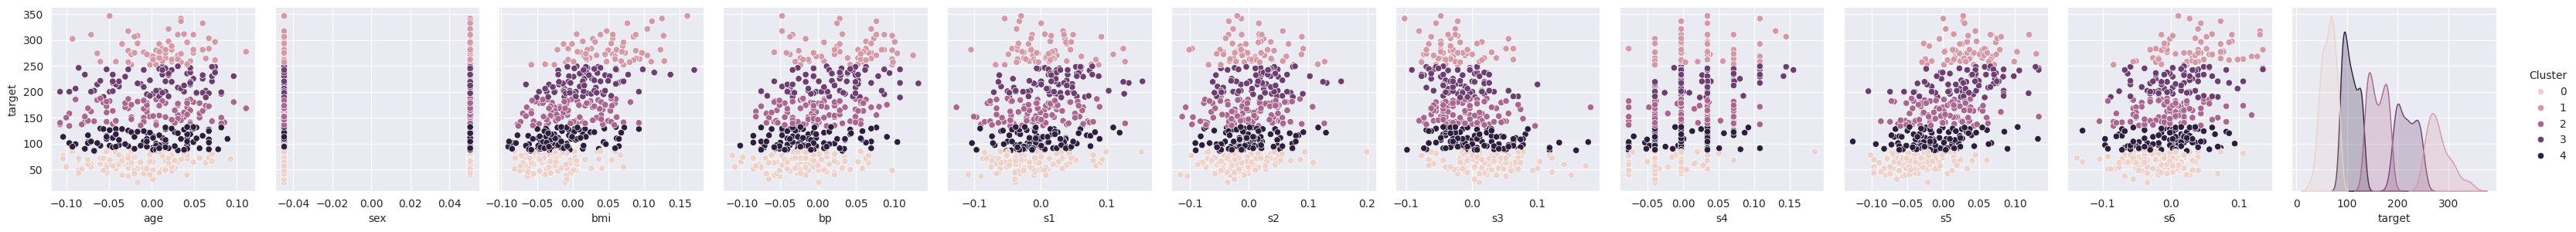

In [7]:
import seaborn as sns
import  matplotlib.pyplot as plt


#sns.pairplot(data,  y_vars=['target']  , x_vars = data.columns , height=3 )
sns.pairplot(data, y_vars=['target'], x_vars=data.columns[:-1], hue='Cluster', height=3)
plt.show()

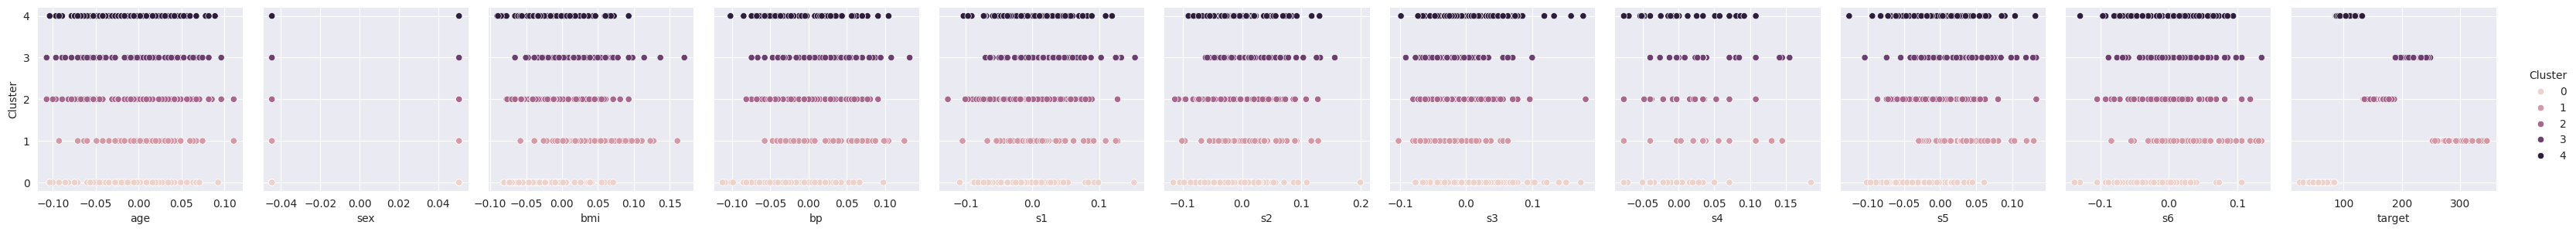

In [8]:
#sns.pairplot(data,  y_vars=['Cluster']  , x_vars = data.columns , height=3 )
sns.pairplot(data, y_vars=['Cluster'], x_vars=data.columns[:-1], hue='Cluster', height=3)
plt.show()

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import pandas as pd

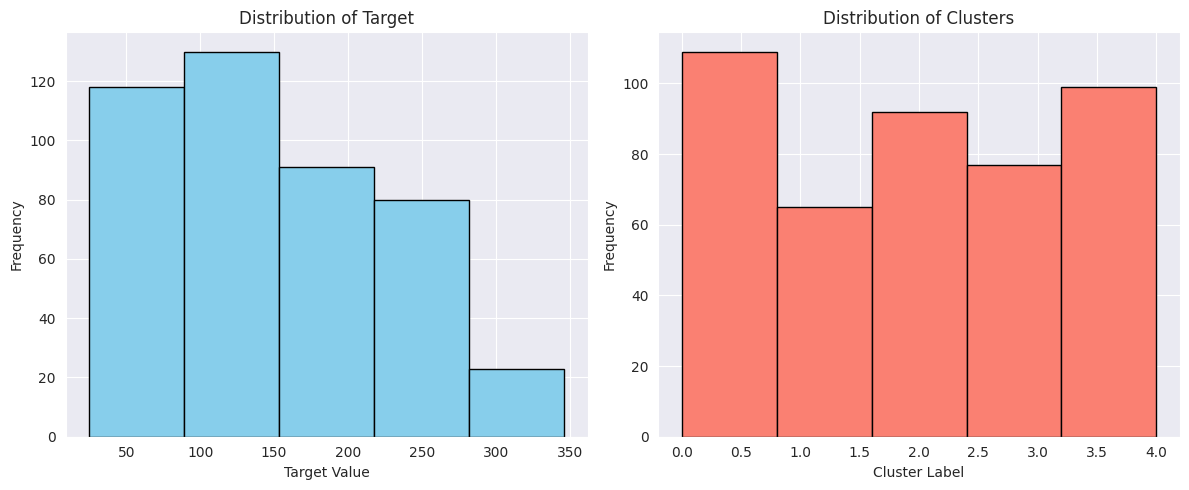

In [10]:
plt.figure(figsize=(12, 5))

# هیستوگرام Target
plt.subplot(1, 2, 1)
plt.hist(data['target'], bins=optimal_k, color='skyblue', edgecolor='black')
plt.title('Distribution of Target')
plt.xlabel('Target Value')
plt.ylabel('Frequency')

# هیستوگرام Cluster
plt.subplot(1, 2, 2)
plt.hist(data['Cluster'], bins=optimal_k, color='salmon', edgecolor='black')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster Label')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

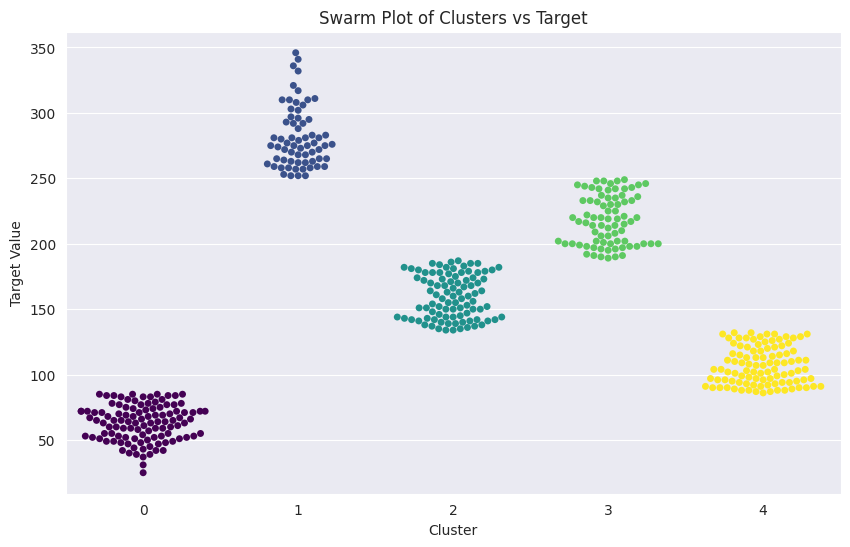

In [11]:
plt.figure(figsize=(10, 6))
sns.swarmplot(
    x='Cluster',
    y='target',
    hue='Cluster',
    data=data,
    palette='viridis',
    legend=False
)
plt.title('Swarm Plot of Clusters vs Target')
plt.xlabel('Cluster')
plt.ylabel('Target Value')
plt.show()

In [12]:
import seaborn as sns
from sklearn.linear_model import LinearRegression

# تبدیل به لیست
features =data.columns.tolist()

# نمایش نام ستون‌ها به عنوان یک لیست
print(features)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target', 'Cluster']


In [14]:
data[features].corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,Cluster
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889,0.078589
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062,0.017553
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450,0.042587
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482,0.037235
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022,0.137175
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054,0.121806
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789,-0.097648
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453,0.126515
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883,0.190631
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483,0.034123


In [43]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
X1 = data.drop('target', axis=1)
X=X1.drop('Cluster', axis=1)
y = data['target']  # ستون هدف


In [45]:
# تقسیم‌بندی داده‌ها به مجموعه آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=0)


In [47]:
# ایجاد مدل KNN
k = int(np.sqrt(len(y_train)))  # تعداد همسایه‌ها
knn = KNeighborsRegressor(n_neighbors=k)

# آموزش مدل
knn.fit(X_train, y_train)

# پیش‌بینی
y_pred = knn.predict(X_test)
r2 = r2_score(y_test, y_pred)
# محاسبه خطای میانگین مربعات
mse1 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error KNN Regression: {mse1}')
print(f'R2 Squared KNN Regression:{r2} ')

Mean Squared Error KNN Regression: 3031.242382271468
R2 Squared KNN Regression:0.32668236158982367 


In [48]:
# ایجاد مدل رگرسیون خطی
linear_model = LinearRegression()

# آموزش مدل
linear_model.fit(X_train, y_train)

# پیش‌بینی
y_pred = linear_model.predict(X_test)
r2_lin = r2_score(y_test, y_pred)
# محاسبه خطای میانگین مربعات
mse2 = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error linear Regression: {mse2}')

print(f'R2 Squared LinearRegression:{r2_lin} ')

Mean Squared Error linear Regression: 2863.4579020153615
R2 Squared LinearRegression:0.3639516511288756 


In [49]:
# ایجاد مدل رگرسیون ریج
ridge_model = Ridge(alpha=1.0)

# آموزش مدل رگرسیون ریج
ridge_model.fit(X_train, y_train)

# پیش‌بینی با رگرسیون ریج
y_pred_ridge = ridge_model.predict(X_test)

# محاسبه خطای میانگین مربعات برای رگرسیون ریج
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Mean Squared Error (Ridge Regression): {mse_ridge}')
print(f'R2 Score RidgeRegression:{r2_ridge} ')

Mean Squared Error (Ridge Regression): 3028.113055308573
R2 Squared RidgeRegression:0.3273774663603274 


In [50]:
# ایجاد مدل رگرسیون لاسو
lasso_model = Lasso(alpha=1.0)

# آموزش مدل رگرسیون لاسو
lasso_model.fit(X_train, y_train)

# پیش‌بینی با رگرسیون لاسو
y_pred_lasso = lasso_model.predict(X_test)

# محاسبه خطای میانگین مربعات برای رگرسیون لاسو
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f'Mean Squared Error (Lasso Regression): {mse_lasso}')
print(f'R2 Score LassoRegression:{r2_lasso} ')

Mean Squared Error (Lasso Regression): 3378.4580807641973
R2 Score LassoRegression:0.24955673960215674 


In [51]:

# 3. رگرسیون چندجمله‌ای
poly_features = PolynomialFeatures(degree=2)  # درجه چندجمله‌ای (می‌توانیم درجه را تغییر دهیم)
X_train_poly = poly_features.fit_transform(X_train)  # ایجاد ویژگی‌های چندجمله‌ای برای داده‌های آموزشی
X_test_poly = poly_features.transform(X_test)  # ایجاد ویژگی‌های چندجمله‌ای برای داده‌های تست

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)  # آموزش مدل بر روی ویژگی‌های چندجمله‌ای
y_pred_poly = poly_model.predict(X_test_poly)  # پیش‌بینی
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print(f'Mean Squared Error Polynomial Regression: {mse_poly}')
print(f'R2 Score poly:{r2_poly} ')


Mean Squared Error Polynomial Regression: 3025.6161992436796
R2 Score poly:0.327932082922466 


#روش فیچر به فیچر و در نهایت میانگین تارگت های همسایگان مجوریتی

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error, r2_score
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
# تعریف ستون‌های هدف و کلاستر
target_col = 'target'  # ستون هدف (مقادیر عددی)
cluster_col = 'Cluster'  # ستون کلاستر (مقادیر دسته‌ای)

# جدا کردن ویژگی‌ها، برچسب‌ها و کلاسترها
X = data.drop(columns=[target_col, cluster_col]).values
y = data[target_col].values
clusters = data[cluster_col].values


In [ ]:
# تقسیم داده به train و test
X_train, X_test, y_train, y_test, clusters_train, clusters_test = train_test_split(X, y, clusters, test_size=0.13, random_state=0)

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# تعیین k
k = int(np.sqrt(len(y_train)))

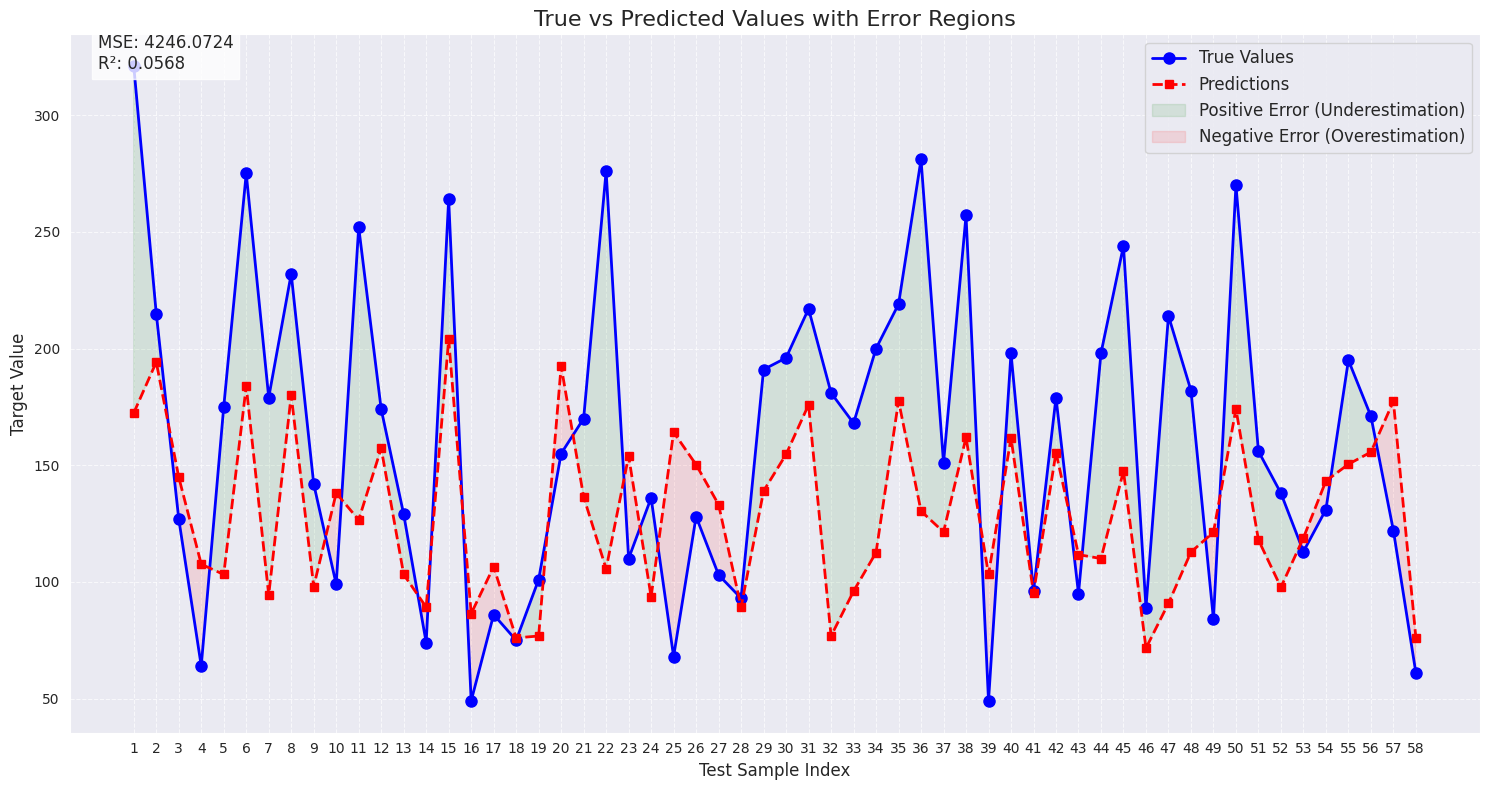

In [23]:


# لیست‌های ذخیره‌سازی نتایج
final_predictions = []
feature_predictions_all = []

# پردازش هر نمونه تست
for i in range(len(X_test)):
    feature_predictions = []

    # پردازش هر ویژگی به صورت جداگانه
    for feature_idx in range(X.shape[1]):
        # انتخاب فقط یک ویژگی از داده‌های آموزش
        X_train_feature = X_train_scaled[:, feature_idx].reshape(-1, 1)
        X_test_feature = X_test_scaled[i, feature_idx].reshape(1, -1)

        # آموزش KNN برای کلاسترینگ روی این ویژگی
        knn_cluster = KNeighborsClassifier(n_neighbors=k)
        knn_cluster.fit(X_train_feature, clusters_train)

        # پیش‌بینی کلاستر برای این ویژگی
        predicted_cluster = knn_cluster.predict(X_test_feature)[0]

        # یافتن همسایگان با کلاستر پیش‌بینی شده در این ویژگی
        neighbor_mask = (clusters_train == predicted_cluster)
        y_neighbors = y_train[neighbor_mask]

        # محاسبه میانگین تارگت‌های همسایگان این ویژگی
        if len(y_neighbors) > 0:
            feature_pred = np.mean(y_neighbors)
        else:
            # اگر همسایه‌ای نبود، از میانگین کل کلاستر استفاده می‌کنیم
            cluster_mask = (clusters_train == predicted_cluster)
            y_cluster = y_train[cluster_mask]
            if len(y_cluster) > 0:
                feature_pred = np.mean(y_cluster)
            else:
                feature_pred = np.mean(y_train)  # اگر کلاستر خالی بود

        feature_predictions.append(feature_pred)

    # ذخیره پیش‌بینی‌های تمام ویژگی‌ها برای این نمونه تست
    feature_predictions_all.append(feature_predictions)

    # محاسبه پیش‌بینی نهایی (میانگین پیش‌بینی‌های تمام ویژگی‌ها)
    final_prediction = np.mean(feature_predictions)
    final_predictions.append(final_prediction)

# محاسبه MSE و R-squared
mse = mean_squared_error(y_test, final_predictions)
r2 = r2_score(y_test, final_predictions)

# رسم نمودار مقایسه با ناحیه خطای رنگی
plt.figure(figsize=(15, 8))

# ایجاد شاخص برای نمونه‌های تست
sample_numbers = np.arange(1, len(y_test) + 1)

# Plot actual and predicted values
plt.plot(sample_numbers, y_test, 'o-', label='True Values', color='blue', markersize=8, linewidth=2)
plt.plot(sample_numbers, final_predictions, 's--', label='Predictions', color='red', markersize=6, linewidth=2)

# Fill between areas
plt.fill_between(sample_numbers,
                 y_test,
                 final_predictions,
                 where=(y_test >= final_predictions),
                 interpolate=True,
                 color='green', alpha=0.1, label='Positive Error (Underestimation)')

plt.fill_between(sample_numbers,
                 y_test,
                 final_predictions,
                 where=(y_test <= final_predictions),
                 interpolate=True,
                 color='red', alpha=0.1, label='Negative Error (Overestimation)')

# Chart settings
plt.title('True vs Predicted Values with Error Regions', fontsize=16)
plt.xlabel('Test Sample Index', fontsize=12)
plt.ylabel('Target Value', fontsize=12)
plt.xticks(sample_numbers, range(1, len(y_test)+1))
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper right')

# نمایش مقدار MSE و R-squared روی نمودار
plt.text(0.02, 0.95, f'MSE: {mse:.4f}\nR²: {r2:.4f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

  روش فیچر به فیچر استفاده از رگرسیون خطی و درنهایت میانگین

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, r2_score

In [25]:
target_col = 'target'  # ستون هدف (مقادیر عددی)
feature_cols = data.columns.drop([target_col])  # لیست ستون‌های ویژگی

# جدا کردن ویژگی‌ها و تارگت
X = data[feature_cols].values
y = data[target_col].values

# تقسیم داده به train و test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=0)

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [33]:


# لیست ذخیره پیش‌بینی‌های هر ویژگی برای هر نمونه تست
feature_predictions_per_test = []

# پردازش هر نمونه تست
for i in range(len(X_test)):
    # لیست ذخیره پیش‌بینی‌های هر ویژگی برای این نمونه تست
    single_test_feature_predictions = []

    # پردازش هر ویژگی به صورت جداگانه
    for feature_idx in range(X.shape[1]):
        # انتخاب فقط یک ویژگی از داده‌های آموزش
        X_train_feature = X_train_scaled[:, feature_idx].reshape(-1, 1)
        y_train_target = y_train

        # آموزش رگرسیون خطی روی این ویژگی
        lr = LinearRegression()
        lr.fit(X_train_feature, y_train_target)

        # پیش‌بینی برای این ویژگی در نمونه تست فعلی
        X_test_feature = X_test_scaled[i, feature_idx].reshape(1, -1)
        pred = lr.predict(X_test_feature)[0]
        single_test_feature_predictions.append(pred)

    # ذخیره بردار پیش‌بینی‌های این نمونه تست
    feature_predictions_per_test.append(single_test_feature_predictions)

# تبدیل لیست به آرایه numpy
feature_predictions_per_test = np.array(feature_predictions_per_test)




# MSE برای میانگین پیش‌بینی‌های هر ویژگی
mean_feature_predictions = np.mean(feature_predictions_per_test, axis=1)
mse_mean_features = mean_squared_error(y_test, mean_feature_predictions)
r2_mean_features = r2_score(y_test, mean_feature_predictions)




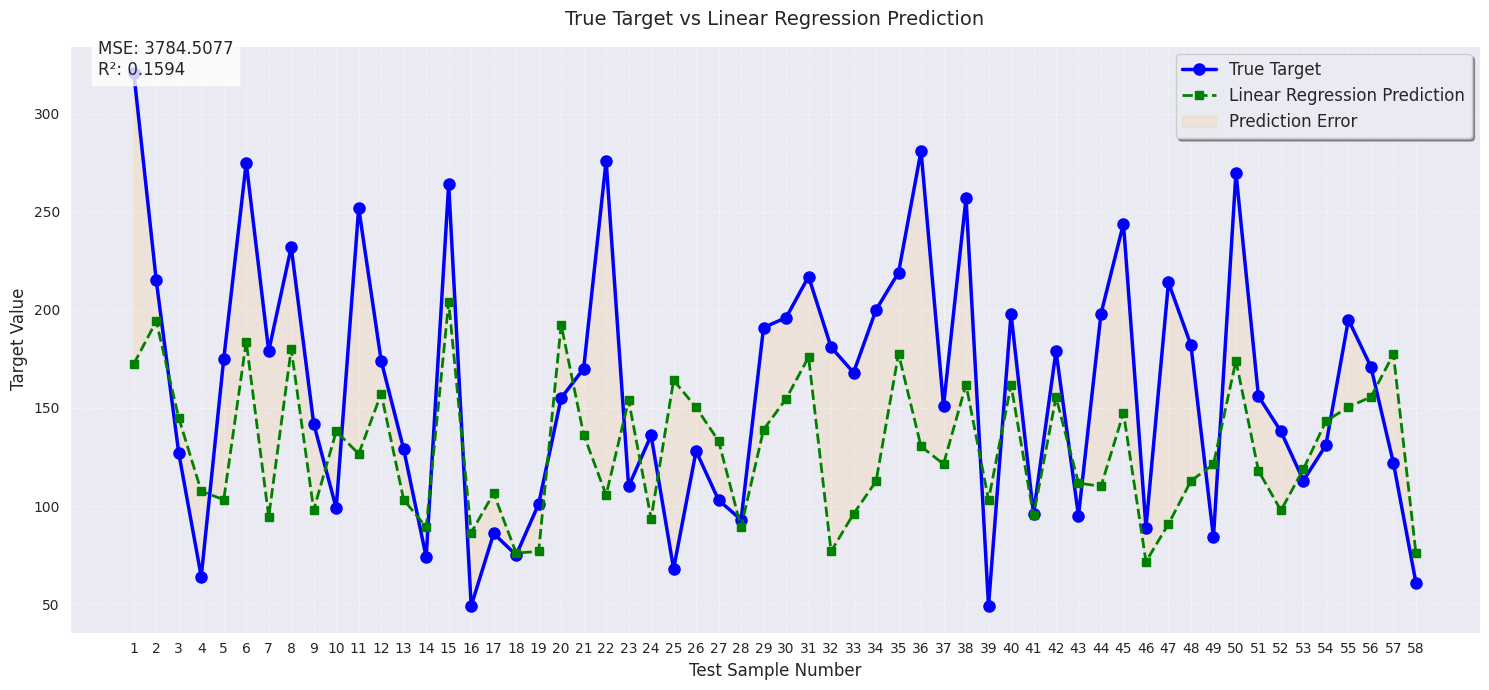

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# تنظیمات سبک نمودار

plt.figure(figsize=(15, 7))

# ایجاد داده برای نمودار
sample_numbers = np.arange(1, len(y_test)+1)
df_plot = pd.DataFrame({
    'Sample': sample_numbers,
    'True Target': y_test,
    'Linear Regression Prediction': final_predictions
})

# رسم نمودار خطی
plt.plot('Sample', 'True Target', data=df_plot,
         marker='o', markersize=8, linewidth=2.5,
         color='blue', label='True Target')

plt.plot('Sample', 'Linear Regression Prediction', data=df_plot,
         marker='s', markersize=6, linewidth=2, linestyle='--',
         color='green', label='Linear Regression Prediction')

# اضافه کردن خطاها به صورت نواری (اختیاری)
plt.fill_between(sample_numbers, y_test, final_predictions,
                 color='orange', alpha=0.1, label='Prediction Error')

# تنظیمات ظاهری
plt.title('True Target vs Linear Regression Prediction', fontsize=14, pad=15)
plt.xlabel('Test Sample Number', fontsize=12)
plt.ylabel('Target Value', fontsize=12)
plt.xticks(sample_numbers)
plt.grid(True, linestyle='--', alpha=0.4)

# نمایش مقدار MSE
# نمایش مقدار MSE و R-squared روی نمودار
plt.text(0.02, 0.95, f'MSE: {mse_mean_features:.4f}\nR²: {r2_mean_features:.4f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.8))

plt.legend(fontsize=12, frameon=True, shadow=True)
plt.tight_layout()
plt.show()

روش فیچر به فیچر  استفاده از کی ان ان رگرسیون و در نهایت میانگین

In [36]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error


In [37]:
target_col = 'target'  # ستون هدف (عددی)
feature_cols = data.columns.drop(target_col)  # لیست ویژگی‌ها

# آماده‌سازی داده‌ها
X = data[feature_cols].values
y = data[target_col].values


In [40]:
# تقسیم داده به آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.13, random_state=0)

# نرمال‌سازی داده‌ها
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# تعیین تعداد همسایه‌ها (k)
k = int(np.sqrt(len(X_train)))

In [41]:
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# لیست ذخیره پیش‌بینی‌های هر ویژگی برای هر نمونه تست
feature_preds = []

# پیش‌بینی هر ویژگی به صورت جداگانه با KNN رگرسیون
for i in range(X_test.shape[0]):
    sample_preds = []
    for feature_idx in range(X.shape[1]):
        # آموزش مدل روی یک ویژگی
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train_scaled[:, feature_idx].reshape(-1, 1), y_train)

        # پیش‌بینی برای ویژگی فعلی
        pred = knn.predict(X_test_scaled[i, feature_idx].reshape(1, -1))[0]
        sample_preds.append(pred)
    feature_preds.append(sample_preds)

feature_preds = np.array(feature_preds)

# محاسبه پیش‌بینی نهایی (میانگین پیش‌بینی‌های ویژگی‌ها)
final_preds = np.mean(feature_preds, axis=1)

# محاسبه معیارهای ارزیابی
mse_final = mean_squared_error(y_test, final_preds)
r2_final = r2_score(y_test, final_preds)

print("نتایج ارزیابی مدل:")
print(f"MSE: {mse_final:.4f}")
print(f"R-squared: {r2_final:.4f}")



نتایج ارزیابی مدل:
MSE: 2991.2595
R-squared: 0.3356


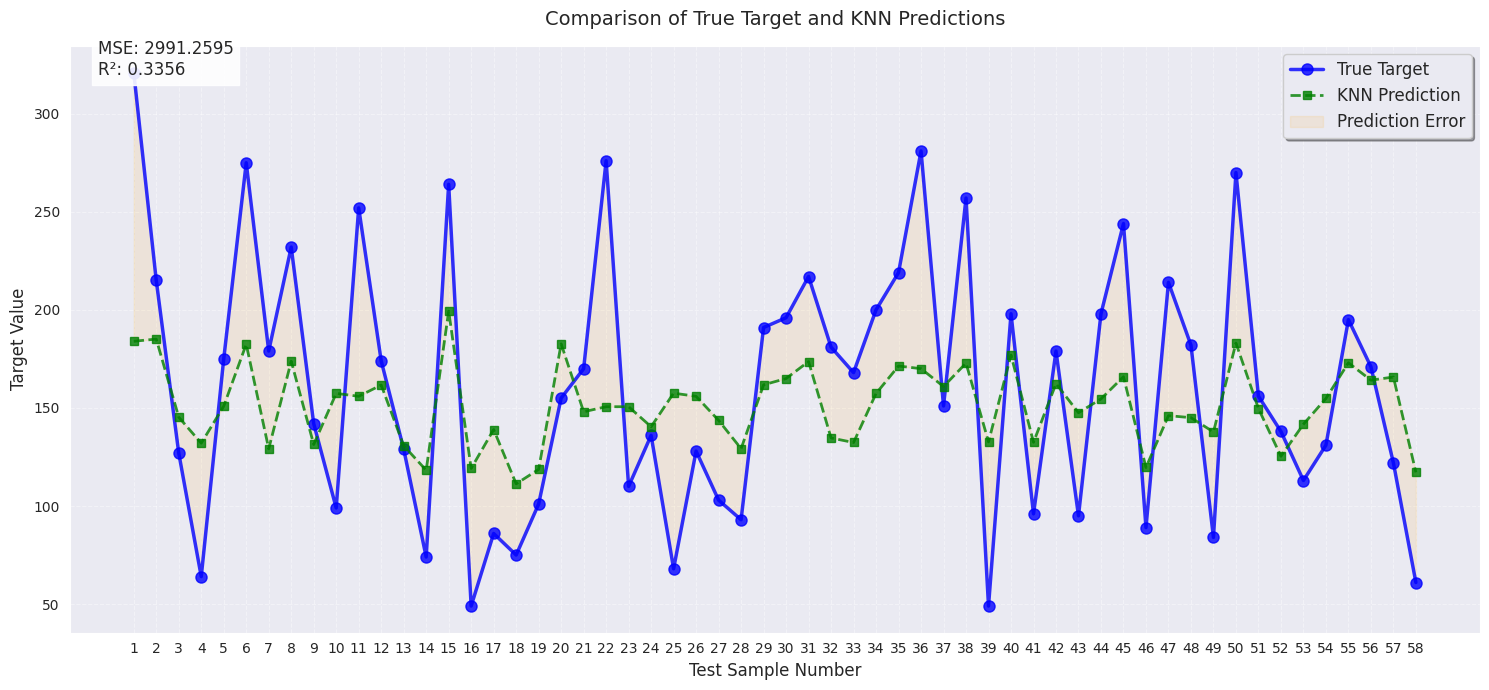

In [42]:
import seaborn as sns

# تنظیمات نمودار
plt.figure(figsize=(15, 7))

# ایجاد داده برای نمودار
sample_numbers = np.arange(1, len(y_test)+1)

# رسم مقادیر واقعی و پیش‌بینی شده
plt.plot(sample_numbers, y_test, 'o-', label='True Target',
         color='blue', markersize=8, linewidth=2.5, alpha=0.8)
plt.plot(sample_numbers, final_preds, 's--', label='KNN Prediction',
         color='green', markersize=6, linewidth=2, alpha=0.8)


plt.fill_between(sample_numbers, y_test, final_preds, color='orange', alpha=0.1, label='Prediction Error')

# تنظیمات ظاهری
plt.title('Comparison of True Target and KNN Predictions', fontsize=14, pad=15)
plt.xlabel('Test Sample Number', fontsize=12)
plt.ylabel('Target Value', fontsize=12)
plt.xticks(sample_numbers)
plt.grid(True, linestyle='--', alpha=0.4)

# نمایش مقدار MSE
plt.text(0.02, 0.95, f'MSE: {mse_final:.4f}\nR²: {r2_final:.4f}', transform=plt.gca().transAxes,
         fontsize=12, bbox=dict(facecolor='white', alpha=0.9))


plt.legend(fontsize=12, frameon=True, shadow=True)

plt.tight_layout()
plt.show()